In [99]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [100]:
import numpy as np
import pandas as pd
from datetime import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [101]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy0
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [102]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [103]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [104]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [105]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [106]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [107]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by((Measurement.date).desc()).first()
most_recent_date

('2017-08-23',)

In [108]:
# Create the SQLAlchemy inspector and connect it to the engine
inspector = inspect(engine)

In [109]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
inspector.get_table_names()
columns = inspector.get_columns('measurement') 

In [110]:
# Starting from the most recent data point in the database. 
session.query(Measurement.date, Measurement.prcp).all()

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [111]:
# Calculate the date one year from the last date in data set.
latest_date = dt.strptime(most_recent_date[0], '%Y-%m-%d')
# Print the date in 'YYYY-MM-DD' format
formatted_date = latest_date.strftime('%Y-%m-%d')
print(formatted_date)

2017-08-23


In [112]:
# Calculate the date one year before the latest_date
previous_date = latest_date - td(days=365)
# Print the previous date in 'YYYY-MM-DD' format
formatted_previous_date = previous_date.strftime('%Y-%m-%d')
print(formatted_previous_date)

2016-08-23


In [113]:
# Perform a query to retrieve the data and precipitation scores
previous_year = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23').all()
previous_year

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [114]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
previous_year_df = pd.DataFrame(previous_year, columns=['date', 'precipitation']).set_index('date')
previous_year_df

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [115]:
# Sort the dataframe by date
previous_year_df = previous_year_df.sort_values(by='date')
previous_year_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


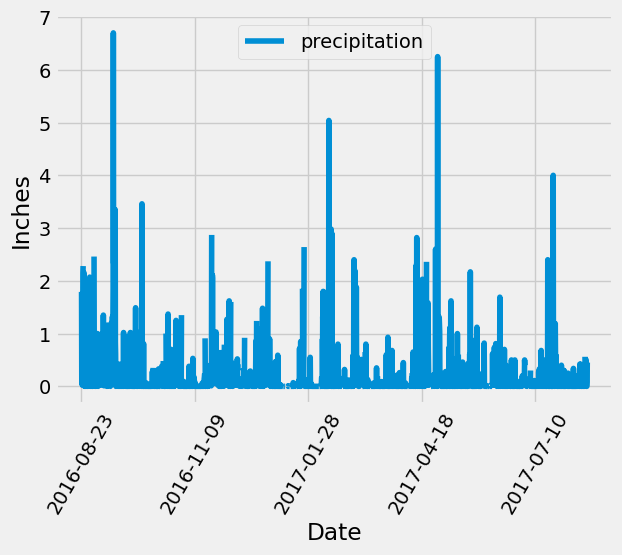

In [116]:
# Use Pandas Plotting with Matplotlib to plot the data
previous_year_df.plot()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=60)
plt.show()

In [117]:
# Use Pandas to calculate the summary statistics for the precipitation data
previous_year_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [118]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [119]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
        all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [120]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lo_temperature = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()[0]
hi_temperature = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()[0]
avg_temperature = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()[0]

# Use the correct variable names in the print statements
print(f"Low Temperature: {lo_temperature}°F")
print(f"Highest Temperature: {hi_temperature}°F")
print(f"Average Temperature: {avg_temperature:.2f}°F")

Low Temperature: 54.0°F
Highest Temperature: 85.0°F
Average Temperature: 71.66°F


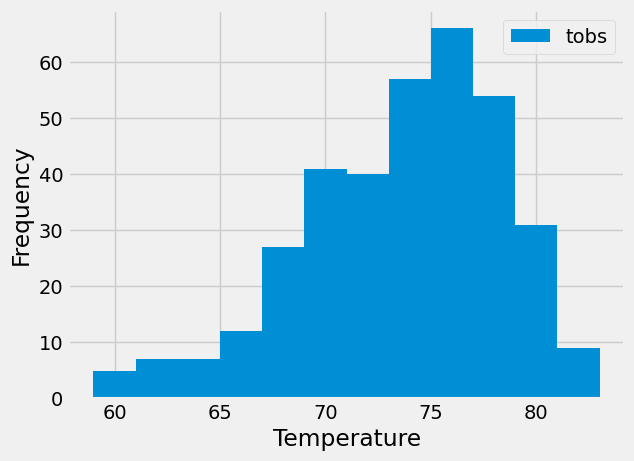

In [121]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Find the most active station
most_active_station = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).first()[0]

# Find the most recent observation date for the most active station
most_recent_date = session.query(func.max(Measurement.date)).\
    filter(Measurement.station == most_active_station).first()[0]

# Convert the most recent date to a datetime object
latest_date = dt.strptime(most_recent_date, '%Y-%m-%d')

# Calculate the date 12 months prior
previous_date = latest_date - td(days=365)

# Query the last 12 months of data for this station
most_active_last_12 = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= previous_date).all()

# Create a Pandas DataFrame using the most active station's last 12 months of data
ma_temps = pd.DataFrame(most_active_last_12, columns=['tobs'])

# Plot the bar graph separating data into 12 bins
plt.hist(ma_temps['tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(["tobs"])
plt.show()

# Close Session

In [122]:
# Close Session
session.close()